## Train a Naiv Bayes on text only

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd ..

/data/nasif12/home_if12/chengju/project/news


In [3]:
from src.helper import load_sparse_csr

In [18]:
X_train_tfidf = load_sparse_csr("./data/X_train_tfidf.npz")
X_val_tfidf = load_sparse_csr("./data/X_val_tfidf.npz")
X_test_tfidf = load_sparse_csr("./data/X_test_tfidf.npz")

In [19]:
X_train_tfidf.shape

(3801, 18020)

In [20]:
y_train = np.load("./data/y_train.npy")
y_val = np.load("./data/y_val.npy")
y_test = np.load("./data/y_test.npy")

In [21]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [22]:
clf = BernoulliNB()

In [23]:
clf.fit(X_train_tfidf, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
predict_train = clf.predict(X_train_tfidf)
precision_train, recall_train, _ = metrics.precision_recall_curve(y_train, predict_train)
print(metrics.classification_report(y_train, predict_train))

             precision    recall  f1-score   support

          0       0.91      0.76      0.82      1906
          1       0.79      0.92      0.85      1895

avg / total       0.85      0.84      0.84      3801



In [25]:
predict_val = clf.predict(X_val_tfidf)
precision_val, recall_val, _ = metrics.precision_recall_curve(y_val, predict_val)
print(metrics.classification_report(y_val, predict_val))

             precision    recall  f1-score   support

          0       0.85      0.74      0.79       636
          1       0.77      0.87      0.82       631

avg / total       0.81      0.80      0.80      1267



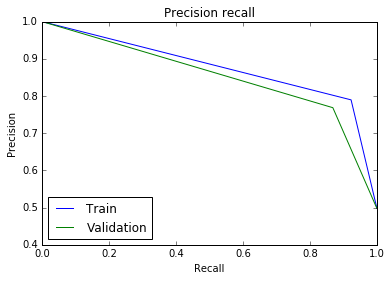

In [26]:
plt.plot(recall_train, precision_train)
plt.plot(recall_val, precision_val)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision recall")
plt.legend(["Train", "Validation"], loc='lower left')
plt.show()

In [27]:
fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, predict_train)
fpr_val, tpr_val, thresholds = metrics.roc_curve(y_val, predict_val)

auc_train = metrics.auc(fpr_train, tpr_train)
auc_val = metrics.auc(fpr_val, tpr_val)

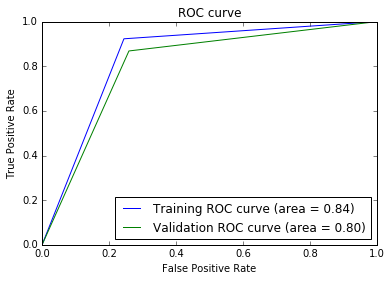

In [28]:
plt.plot(fpr_train, tpr_train,
        label='Training ROC curve (area = %0.2f)' % auc_train)
plt.plot(fpr_val, tpr_val, 
        label='Validation ROC curve (area = %0.2f)' % auc_val)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.legend(loc='lower right')
plt.show()

## Try to reduce dimentionality

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
svd = TruncatedSVD(n_components = 500)

In [31]:
svd.fit(X_train_tfidf)

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=5,
       random_state=None, tol=0.0)

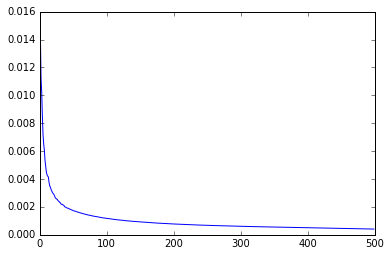

In [32]:
plt.plot(svd.explained_variance_ratio_)

In [33]:
X_train_tfidf100 = svd.transform(X_train_tfidf)
X_val_tfidf100 = svd.transform(X_val_tfidf)

## Fit with reduced dimension

In [34]:
clf_red = BernoulliNB()
clf_red.fit(X_train_tfidf100, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [35]:
predict_train = clf_red.predict(X_train_tfidf100)
precision_train, recall_train, _ = metrics.precision_recall_curve(y_train, predict_train)
print(metrics.classification_report(y_train, predict_train))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85      1906
          1       0.86      0.82      0.84      1895

avg / total       0.84      0.84      0.84      3801



In [36]:
predict_val = clf_red.predict(X_val_tfidf100)
precision_val, recall_val, _ = metrics.precision_recall_curve(y_val, predict_val)
print(metrics.classification_report(y_val, predict_val))

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       636
          1       0.83      0.80      0.81       631

avg / total       0.82      0.82      0.82      1267



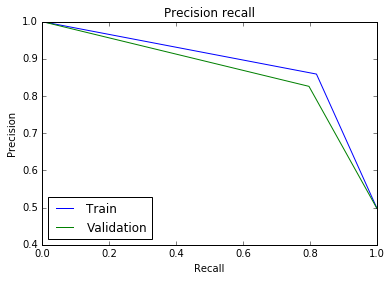

In [37]:
plt.plot(recall_train, precision_train)
plt.plot(recall_val, precision_val)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision recall")
plt.legend(["Train", "Validation"], loc='lower left')
plt.show()

In [38]:
fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, predict_train)
fpr_val, tpr_val, thresholds = metrics.roc_curve(y_val, predict_val)

auc_train = metrics.auc(fpr_train, tpr_train)
auc_val = metrics.auc(fpr_val, tpr_val)

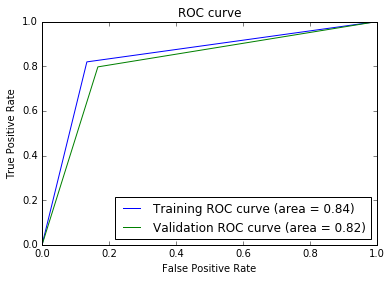

In [39]:
plt.plot(fpr_train, tpr_train,
        label='Training ROC curve (area = %0.2f)' % auc_train)
plt.plot(fpr_val, tpr_val, 
        label='Validation ROC curve (area = %0.2f)' % auc_val)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.legend(loc='lower right')
plt.show()